# Kaggle Competition | Titanic: Machine Learning from Disaster

## Table of Contents:

1. Purpose
2. Data
3. EDA & preprocessing
4. Determine the data mining task
5. Partition the dataset for supervised learning tasks
6. Feature scaling
7. Choose the data mining techniques to be used
8. Use algorithms to perform the task
9. Interpret the results of the algorithms
10. Deploy the model

## Preliminary environment setup

In [1]:
#import packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#set seed as needed for reproducing results
from numpy.random import randn
np.random.seed(12345)

## 1. Purpose

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## 2. Data

The data has been split into two groups:

training set (train.csv)

test set (test.csv)

##### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
#define path
path = '/Users/jeffcorbin/Downloads/'

In [5]:
#import training data
Titanic_train = pd.read_csv(path + 'train.csv')

In [6]:
#import test data
Titanic_test = pd.read_csv(path + 'test.csv')

In [7]:
#get info about train data
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#get info about test data
Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
Titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The train and test sets have been split at about 68/32. The test set is missing the target 'Survived' column, but all other columns are the same.

## 3. EDA & Preprocessing

#### Variable Identification

The target variable is 'Survived' and is binary.

In [11]:
#designate target variable in the train set
targetName = 'Survived'
targetSeries = Titanic_train[targetName]
#remove target from current location and insert in column 0
del Titanic_train[targetName]
Titanic_train.insert(0, targetName, targetSeries)

The PassengerID, Name, and Ticket columns will be dropped as these have no predictive influence.

In [12]:
#drop PassengerID, Name, and Ticket columns from train
Titanic_train.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:
#drop Name and Ticket columns from test
Titanic_test.drop(['Name','Ticket'], axis=1, inplace=True)

#### Missing Values Treatment

In [14]:
#total missing values for each feature in train set
print (Titanic_train.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Detection reveals that the Age, Cabin, and Embarked features contain missing values. 

Age: I'll impute the mean age for any observations with missing values.

Embarked: I'll remove observations with missing values since I'm unable to impute these values and there are only 2 missing.

Cabin: Since I'm not able to infer the cabin, and there are so many null values relative to the total observations in the train set, I will remove this column from both the train and test sets.

In [15]:
#impute Age using mean for train
mean = Titanic_train['Age'].mean()
Titanic_train['Age'].fillna(mean, inplace=True)

In [16]:
#remove Cabin feature from train
train = Titanic_train.drop(['Cabin'], axis=1)

In [17]:
#remove Cabin feature from test
test = Titanic_test.drop(['Cabin'], axis=1)

In [18]:
#remove observations in train where any values are missing
train = train.dropna(how="any")

In [19]:
#total missing values for each feature in test set
print (Titanic_test.isna().sum())

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
#impute Age using mean for test
mean = Titanic_test['Age'].mean()
Titanic_test['Age'].fillna(mean, inplace=True)

In [21]:
#impute Fare using mean for test
mean = Titanic_test['Fare'].mean()
Titanic_test['Fare'].fillna(mean, inplace=True)

In [22]:
#remove Cabin feature from test
test = Titanic_test.drop(['Cabin'], axis=1)

#### Uni-variate Analysis

In [23]:
#import seaborn for visualization
import seaborn as sns
plt.style.use('fivethirtyeight')

CATEGORICAL FEATURES

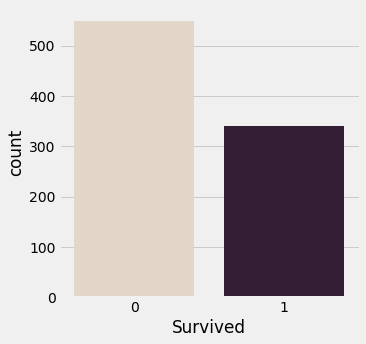

In [24]:
#distribution of cateogrical target using seaborn
sns.catplot(x='Survived',kind="count", palette="ch:.25", data=train)

There is an imbalanced distribution of our target in the train set. This makes sense, given that we know most passengers did not survive the event.

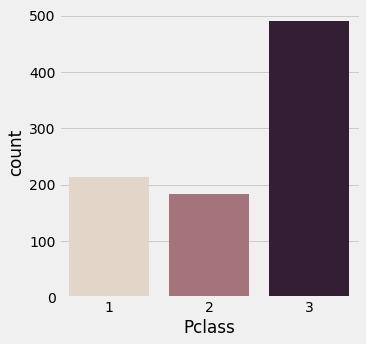

In [25]:
#distribution of categorical features using seaborn
sns.catplot(x='Pclass',kind="count", palette="ch:.25", data=train)

Most passengers were Plcass of 3, described as lower class.

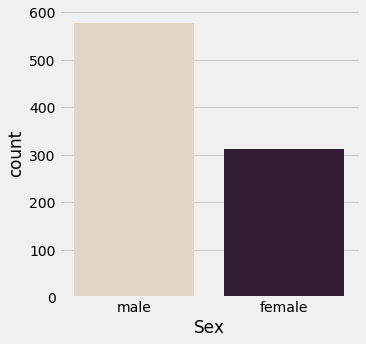

In [26]:
#distribution of categorical features using seaborn
sns.catplot(x='Sex',kind="count", palette="ch:.25", data=train)

In the training set, there are nearly twice as many men as women.

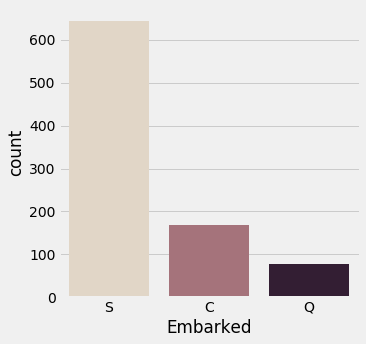

In [27]:
#distribution of categorical features using seaborn
sns.catplot(x='Embarked',kind="count", palette="ch:.25", data=train)

Most passengers embarked from Southampton, representing some imbalance in the feature.

CONTINUOUS FEATURES

In [28]:
#means and standard deviations of continuous features
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
#define continous features object
continuous_features = train[['Age','SibSp','Parch','Fare']].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e4e7b8>,
      dtype=object)

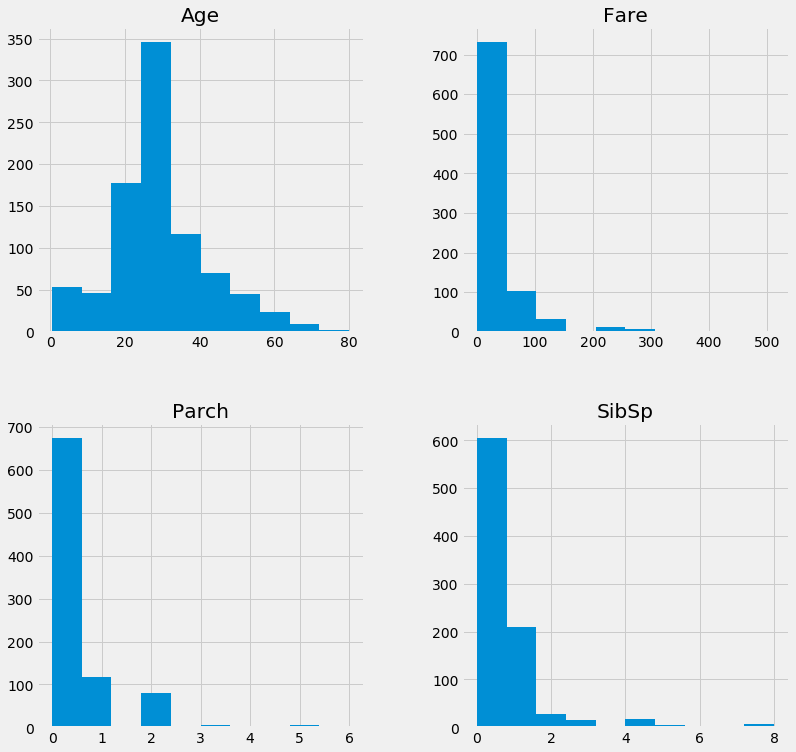

In [30]:
#histograms of each continous feature
continuous_features.hist(figsize=(12,12))

The histograms reveal that the continuous features will need to be scaled to account for some of the non normal distributions as well as accounting for the large difference in units and scales.

#### Bi-variate Analysis

CONTINUOUS & CONTINUOUS

In [31]:
#continuous features - correlation output
print(continuous_features.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.231875 -0.178232  0.088604
SibSp -0.231875  1.000000  0.414542  0.160887
Parch -0.178232  0.414542  1.000000  0.217532
Fare   0.088604  0.160887  0.217532  1.000000


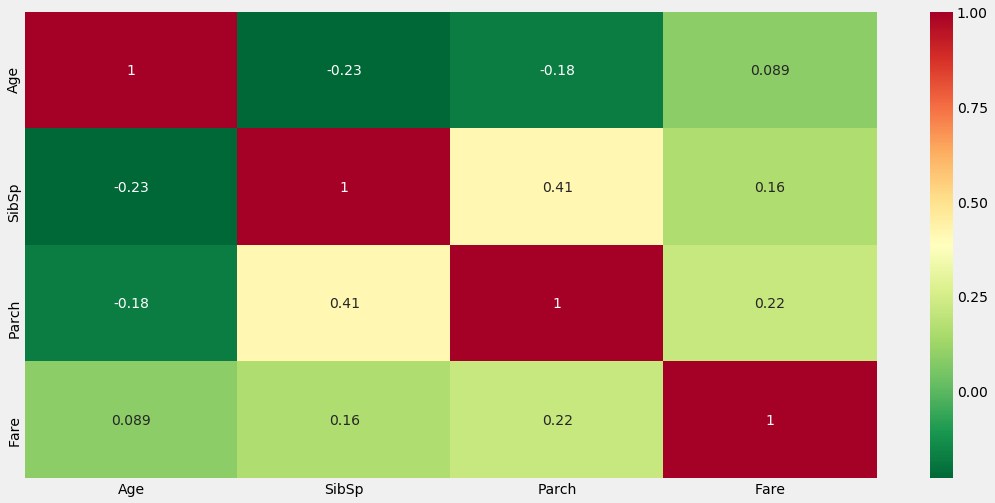

In [32]:
#visualize correlation output using seaborn heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(continuous_features.corr(), cmap="RdYlGn_r", annot=True);

The heatmap shows a modest correlation between the SibSp and Parch features. However, I don't suspect this will have much impact on my models.

In [33]:
#define continous features2 object
continuous_features_2 = train[['Survived','Age','SibSp','Parch','Fare']].copy()

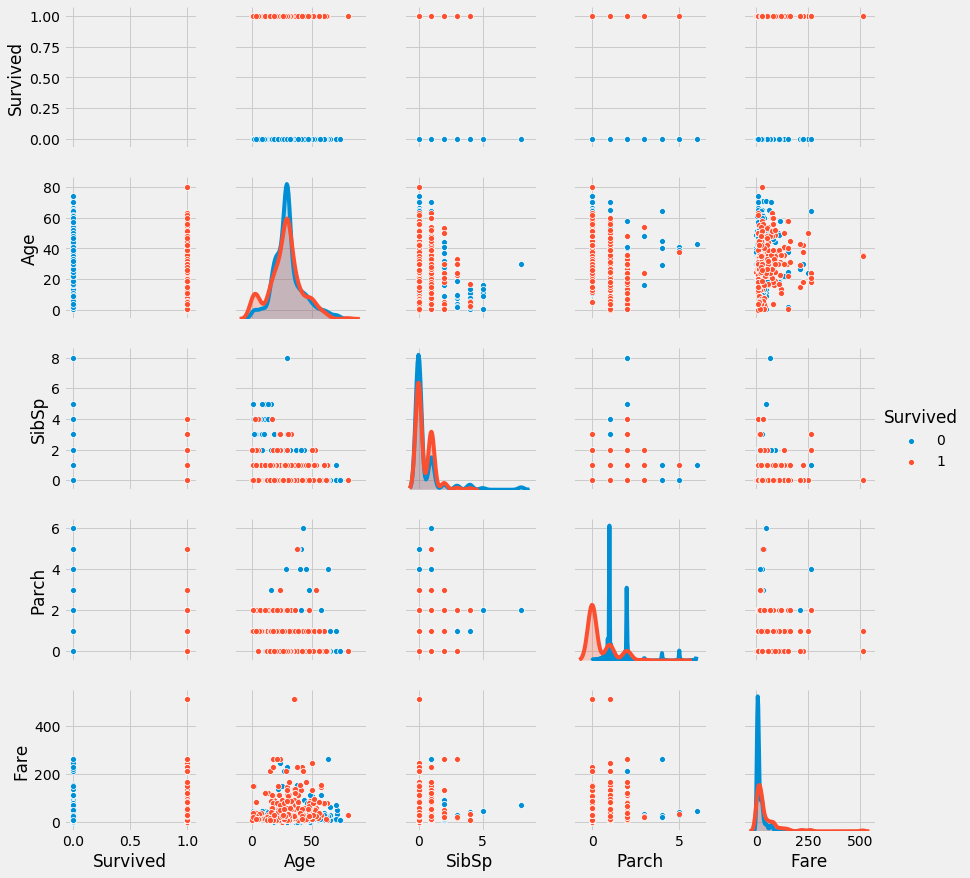

In [34]:
#visualizing multidimensional relationships
sns.pairplot(continuous_features_2, hue='Survived')

#### Feature Engineering

Dummies will be created for each of the categorical features, but first a bit more preprocessing is needed to transform numeric data types to string types so that the below dummy creation will work properly.

In [35]:
#change data type to object for Pclass categorical feature in train set
train['Pclass'] = train['Pclass'].astype('object')

In [36]:
# creates dummies of any categorical feature
for col in train.columns[1:]:
	attName = col
	dType = train[col].dtype
	uniqueCount = len(train[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		train = pd.concat([train, pd.get_dummies(train[col], prefix=col, drop_first=True)], 
                          axis=1)
		del train[attName]

In [37]:
#change data type to object for Pclass categorical feature in test set
test['Pclass'] = test['Pclass'].astype('object')

In [38]:
# creates dummies of any categorical feature
for col in test.columns[1:]:
	attName = col
	dType = test[col].dtype
	uniqueCount = len(test[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		test = pd.concat([test, pd.get_dummies(test[col], prefix=col, drop_first=True)], 
                          axis=1)
		del test[attName]

## 4. Determine the data mining task

Our goal from step 1. is to predict which passengers survived the tragedy.

This is a classification task where our target variable, Survived, is binary (1=survived, 0=did not survive).

## 5. Partition the train dataset for supervised learning tasks

The task is classification, which is a supervised learning task. Therefore, we need to partition the train dataset further into a training and validation set. We will use the given test set from the competition as our test set after training and validating our model.

The train dataset will be partitioned into an 60:40 training/validation split.

In [39]:
# split dataset into testing and training using 60:40 split
>>> X, y = train.iloc[:,1:].values, train.iloc[:,0].values
>>> features_train, features_test, target_train, target_test =\
        train_test_split(X, y,
                         test_size=0.40, 
                         random_state=0, 
                         stratify=y)

## 6. Feature scaling

As noted in the previous uni-variate analysis, the continuous features need to be standardized. The training set will be standardized separately from the validation set so as not to introduce new information to the training set prematurely.

In [40]:
# Create the scaler object
scaler = preprocessing.StandardScaler()
# Fit training and validation data on the scaler object
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [41]:
# drop PassengerId from new x_test object for scaling test set
x_test = test.drop(['PassengerId'], axis=1)

In [42]:
# fit test data on the scalar object
x_test_scaled = scaler.fit_transform(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 7. Choose the data mining techniques to be used

Linear SVC, KNN, and Ensemble methods will be compared to find the 'best' model.

## 8. Use algorithms to perform the task

### Linear SVC - default parameters

L2 penalty, Cost function of 1, Class weight = none, max iterations = 1000

In [43]:
from sklearn.svm import LinearSVC
linSVC = LinearSVC()
#Call up the model to see the parameters you can tune (and their default setting)
print(linSVC)
linSVC.fit(features_train_scaled, target_train)
predicted_SVC = linSVC.predict(features_test_scaled)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVC))
print(confusion_matrix(expected, predicted_SVC))
print("Test accuracy:",accuracy_score(expected,predicted_SVC))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       220
           1       0.76      0.73      0.74       136

   micro avg       0.81      0.81      0.81       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.81      0.81      0.81       356

[[188  32]
 [ 37  99]]
Test accuracy: 0.8061797752808989


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Received a warning message indicating we may need to adjust some of the default parameters.

### Linear SVC - tune class weight & dual parameters

L2 penalty, Cost function of 1, Class weight = balanced, max iterations = 1000, dual = false

We know from the EDA that there is imbalance in the target variable, so we will set the class weight paramter to balanced to account for this in our next variation of the Linear SVC model. Also, the sklearn.SVM.LinearSVC documentation suggests tuning the dual parameter to false when n_samples > n_features, which is the case here.

In [44]:
linSVC = LinearSVC(dual=False, class_weight='balanced')
linSVC.fit(features_train_scaled, target_train)
predicted_SVC = linSVC.predict(features_test_scaled)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVC))
print(confusion_matrix(expected, predicted_SVC))
print("Test accuracy:",accuracy_score(expected,predicted_SVC))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       220
           1       0.70      0.77      0.73       136

   micro avg       0.78      0.78      0.78       356
   macro avg       0.77      0.78      0.78       356
weighted avg       0.79      0.78      0.79       356

[[174  46]
 [ 31 105]]
Test accuracy: 0.7837078651685393


We've solved for the convergence warning, but our model has lost some accuracy. A grid search may help with this to find the optimal value of the cost function (C) parameter to try on our next variation.

##### Grid search of cost function with cross validation

In [45]:
import time
start_time = time.clock()
parameters = {'C':[.01,.05,1,3,4,9,10]}
svc = LinearSVC(dual=False, class_weight='balanced')
grid_svm = GridSearchCV(svc, parameters,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
print("Time to run", time.clock() - start_time, "seconds")

BEST SCORE 0.776735459662289
BEST PARAM {'C': 0.05}
Time to run 0.1841419999999978 seconds


### Linear SVC - tune cost function, class weight & dual parameters

L2 penalty, Cost function of 0.05, Class weight = balanced, max iterations = 1000, dual = false

In [46]:
linSVC = LinearSVC(dual=False, C=0.05, class_weight='balanced')
linSVC.fit(features_train_scaled, target_train)
predicted_SVC = linSVC.predict(features_test_scaled)
expected = target_test
# summarize the fit of the model
print(classification_report(expected, predicted_SVC))
print(confusion_matrix(expected, predicted_SVC))
print("Test accuracy:",accuracy_score(expected,predicted_SVC))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       220
           1       0.69      0.77      0.73       136

   micro avg       0.78      0.78      0.78       356
   macro avg       0.77      0.78      0.77       356
weighted avg       0.79      0.78      0.78       356

[[173  47]
 [ 31 105]]
Test accuracy: 0.7808988764044944


Results are near exact to the previous variation results.

###### Cross validation

In [47]:
#verify Linear SVC with cross validation
scores = cross_val_score(linSVC, features_train_scaled, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K:", scores)
print("Cross Validation Score Mean:", scores.mean())

Cross Validation Score for each K: [0.81481481 0.83333333 0.81481481 0.7962963  0.73584906 0.81132075
 0.69811321 0.79245283 0.69811321 0.73076923]
Cross Validation Score Mean: 0.7725877546632265


Cross validation is stable, which is a good sign the model is not overfitting.

### KNN-5 - default parameters

Metric = minkowski, n_neighbors = 5, weights = uniform, p = 2 (Euclidean distance when Metric = minkowski)

In [48]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(knn)

#Fit model to the training data
knn = knn.fit(features_train_scaled, target_train)
#Predict KNN model again test data
target_predicted_knn = knn.predict(features_test_scaled)
print("Test accuracy:", accuracy_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Test accuracy: 0.8174157303370787
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       220
           1       0.78      0.74      0.75       136

   micro avg       0.82      0.82      0.82       356
   macro avg       0.81      0.80      0.80       356
weighted avg       0.82      0.82      0.82       356

[[191  29]
 [ 36 100]]


Accuracy and f scores are already higher than the Linear SVC model. Improvement may be possible by tuning. A grid search may help with this to find the optimal value of the n_neighbors, weights, and metric parameters.

##### Grid search of n_neighbors, weights, and metric using cross validation

In [49]:
start_time = time.clock()
parameters = {'n_neighbors':[1,3,5,7], 
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}
knn = neighbors.KNeighborsClassifier()
grid_knn = GridSearchCV(knn, parameters,n_jobs=-1, cv=3)
grid_knn.fit(features_train, target_train)
print("BEST SCORE", grid_knn.best_score_)
print("BEST PARAMS", grid_knn.best_params_)
print("Time to run", time.clock() - start_time, "seconds")

BEST SCORE 0.7429643527204502
BEST PARAMS {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Time to run 0.06466999999999956 seconds


### KNN-5 - tune metric and weights parameters

In [50]:
knn = neighbors.KNeighborsClassifier(metric='manhattan',weights='distance')
#Fit model to the training data
knn = knn.fit(features_train_scaled, target_train)
#Predict KNN model again test data
target_predicted_knn = knn.predict(features_test_scaled)
print("Test accuracy:", accuracy_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

Test accuracy: 0.7921348314606742
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       220
           1       0.72      0.74      0.73       136

   micro avg       0.79      0.79      0.79       356
   macro avg       0.78      0.78      0.78       356
weighted avg       0.79      0.79      0.79       356

[[181  39]
 [ 35 101]]


The model did not improve from tuning the parameters. We will move on to cross validating the original default KNN model.

##### Cross validation of KNN-5 - default parameters

In [51]:
#verify KNN-5 with cross validation
scores = cross_val_score(knn, features_train_scaled, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K:", scores)
print("Cross Validation Score Mean:", scores.mean())

Cross Validation Score for each K: [0.75925926 0.75925926 0.7962963  0.77777778 0.66037736 0.81132075
 0.79245283 0.81132075 0.81132075 0.75      ]
Cross Validation Score Mean: 0.7729385045422781


Cross validation is stable, which is a good sign the model is not overfitting.

### Random forest - default parameters

Random forest using default settings (10 trees).

In [52]:
#random forest train model. Call up my model and name it
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(rf)
#Fit rf to the training data
rf = rf.fit(features_train_scaled, target_train)
#Predict rf model against test data
target_predicted_rf = rf.predict(features_test_scaled)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RF Accuracy Score 0.8033707865168539
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       220
           1       0.76      0.71      0.73       136

   micro avg       0.80      0.80      0.80       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356

[[189  31]
 [ 39  97]]


The RF model has done nearly the same as KNN without any tuning yet. We will again run a grid search to try to find optimal or near optimal number of trees for tuning.

##### Grid search of n_estimators using cross validation

In [53]:
start_time = time.clock()
parameters = {'n_estimators':[50,100,500]}
rf = ensemble.RandomForestClassifier()
grid_rf = GridSearchCV(rf, parameters,n_jobs=-1, cv=5)
grid_rf.fit(features_train, target_train)
print("BEST SCORE", grid_rf.best_score_)
print("BEST PARAMS", grid_rf.best_params_)
print("Time to run", time.clock() - start_time, "seconds")

BEST SCORE 0.8048780487804879
BEST PARAMS {'n_estimators': 50}
Time to run 0.14464699999999908 seconds


### Random forest - 50 trees

In [54]:
rf = ensemble.RandomForestClassifier(n_estimators=50)
#Fit rf to the training data
rf = rf.fit(features_train_scaled, target_train)
#Predict rf model again test data
target_predicted_rf = rf.predict(features_test_scaled)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

RF Accuracy Score 0.8089887640449438
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       220
           1       0.74      0.76      0.75       136

   micro avg       0.81      0.81      0.81       356
   macro avg       0.80      0.80      0.80       356
weighted avg       0.81      0.81      0.81       356

[[184  36]
 [ 32 104]]


Not much difference here again with increase of trees.

##### Cross validation of RF-50

In [56]:
#verify RF-50 with cross validation
scores = cross_val_score(rf, features_train_scaled, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K:", scores)
print("Cross Validation Score Mean:", scores.mean())

Cross Validation Score for each K: [0.83333333 0.83333333 0.81481481 0.77777778 0.71698113 0.83018868
 0.79245283 0.8490566  0.83018868 0.73076923]
Cross Validation Score Mean: 0.8008896414556792


## 9. Interpret the results of the algorithms

Since each model performed nearly the same, we will take the last random forest using 100 trees and use this to predict the outcomes of the test set for the competition.

## 10. Deploy the model

In [57]:
#Predict rf model against test data
target_predicted_rf = rf.predict(x_test_scaled)

In [58]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": target_predicted_rf
    })
submission.to_csv('submission.csv', index=False)